## Data Breach Analytics 2005 - 2017

**By Miriam Rodriguez**


### Data Description

#### Dataset
- Dataset name:              Privacy_Rights_Clearinghouse-Data-Breaches-Export.csv
- Source:                    https://www.privacyrights.org/data-breaches (Links to an external site.). 
- Data Description and FAQ:  https://www.privacyrights.org/chronology-data-breaches-faq 
- Duration of the data:      2005 through 2017

#### Data Breach Types
   - CARD - Payment Card Fraud:    Fraud involving debit and credit cards that is not accomplished via hacking (e.g. skimming                                      devices at point-of-service terminals).
   - HACK - Hacking or Malware:    Hacked by outside party or infected by malware
   - INSD - Insider:               Someone with legitimate access intentionally breaches information, such as an employee,                                          contractor, or customer)
   - PHYS - Physical Loss:         Includes paper documents that are lost, discarded, or stolen (non-electronic)
   - PORT - Portable Device:       Lost, discarded, or stolen laptop, PDA, smartphone, memory stick, CDs, hard drive, data tape,                                    etc.
   - STAT - Stationary Device:     Stationary computer loss (lost, inappropriately accessed, discarded, or stolen computer or                                      server not designed for mobility)
   - DISC - Unintended Disclosure: Unintended disclosure (not involving hacking, intentional breach, or physical loss i.e.                                          sensitive information posted publicly, mishandled, sent to the wrong party via publishing                                      online, sending in an email, sending in a mailing or sending via fax.
   - Unknown

#### Institution/Organization) Type
-	BSF - Businesses - Financial and Insurance Services
-	BSO - Businesses - Other
-	BSR - Businesses - Retail/Merchant – Including Online Retail
-	EDU - Educational Institutions
-	GOV - Government & Military
-	MED - Healthcare - Medical Providers & Medical Insurance Services
-	NGO - Nonprofit Organizations

#### Data elements/column names
1.	Date Made Public: Date Breach information released to public (date: year, month, day)
2.	Company: Company breached (text)
3.	City: City of breached company (text)
4.	State: State of breached company (text)
5.	Type of Breach: Refer to four-character Breach Type above
6.	Type of Organization: Refer to three-character Institution/Organization Type above
7.	Total Records: Number of records breached (integer)
8.	Description of Incident: Text describing breach (text)
9.	Information Source: Location of database source (text)
10.	Source URL: Location of data source URL (text)
11.	Year of Breach: Four digit year (numeric)
12.	Latitude: Location Latitude (signed numeric long)
13.	Longitude: Location Longitude (signed numeric long)


In [1]:
# import python packages
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

# Importing Data & Basic Statistics

In [2]:
#import breach data ... open or read the breach data
df=pd.read_csv("Privacy_Rights_Clearinghouse-Data-Breaches-Export.csv")
df.head()


,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude
0,16-May-08,Greil Memorial Psychiatric Hospital,Montgomery,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,Dataloss DB,NaN,2008.0,32.366805,-86.299969
1,21-Mar-08,Compass Bank,Birmingham,Alabama,INSD,BSF,"1,000,000","A database containing names, account \n ...",Dataloss DB,NaN,2008.0,33.520661,-86.802490
2,7-Aug-07,Electronic Data Systems,Montgomery,Alabama,INSD,BSO,498,A former employee \n was arrested t...,Dataloss DB,NaN,2007.0,32.366805,-86.299969
3,3-Jun-07,Gadsden State Community College,College Gadsden,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,Dataloss DB,NaN,2007.0,34.025272,-85.995891
4,5-Apr-07,DCH Health Systems,Tuscaloosa,Alabama,PORT,MED,"6,000",An encrypted disc \n and hardcopy d...,Dataloss DB,NaN,2007.0,33.209841,-87.569174


### Determine data types and missing values

In [3]:
# how many missing values in each column or variable
df.isnull().sum()

Date Made Public              0
Company                       0
City                       2520
State                        68
Type of breach                0
Type of organization          0
Total Records                38
Description of incident       3
Information Source           54
Source URL                 5410
Year of Breach               33
Latitude                      0
Longitude                     0
dtype: int64

In [4]:
# Describe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8202 entries, 0 to 8201
Data columns (total 13 columns):
Date Made Public           8202 non-null object
Company                    8202 non-null object
City                       5682 non-null object
State                      8134 non-null object
Type of breach             8202 non-null object
Type of organization       8202 non-null object
Total Records              8164 non-null object
Description of incident    8199 non-null object
Information Source         8148 non-null object
Source URL                 2792 non-null object
Year of Breach             8169 non-null float64
Latitude                   8202 non-null float64
Longitude                  8202 non-null float64
dtypes: float64(3), object(10)
memory usage: 833.1+ KB


**There are 8202 records total.**  

** There are data quality issues**


** Based upon above counts, there are missing values for City, State, Total_Recs, Description, Breach_Year **


Column name: City 
- How resolved: Drop column. 
- Justification: The majority of cities are not provided.  All we really need is State.

Column name: State
- How resolved: Replace spaces with 'United States'
- Justification: Since this value was not provided in the file, the assumption is that the breach was national.

Column name: Total_Recs 
- How resolved: Move zeros to null values. Then convert to float to remove zeros, then convert to int.
- Justification: This will enable the ability to measure the quanitative impact.

Column name: Description 
- How resolved: Replace spaces with 'None'
- Justification: This value was not provided in the file.

Column name: Breach_Year
- How resolved:   Drop column
- Justification:  We have date with year with no empty values so do not need this field


Remove the following fields as they are not needed:
- Information Source 
- Source URL 

In [5]:
#Two columns (Information Source, Source URL) are not necessary for analysis. They will be dropped.
df = df.drop(['Information Source', 'Source URL'], axis=1)
df.head()

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Year of Breach,Latitude,Longitude
0,16-May-08,Greil Memorial Psychiatric Hospital,Montgomery,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,2008.0,32.366805,-86.299969
1,21-Mar-08,Compass Bank,Birmingham,Alabama,INSD,BSF,"1,000,000","A database containing names, account \n ...",2008.0,33.520661,-86.802490
2,7-Aug-07,Electronic Data Systems,Montgomery,Alabama,INSD,BSO,498,A former employee \n was arrested t...,2007.0,32.366805,-86.299969
3,3-Jun-07,Gadsden State Community College,College Gadsden,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,2007.0,34.025272,-85.995891
4,5-Apr-07,DCH Health Systems,Tuscaloosa,Alabama,PORT,MED,"6,000",An encrypted disc \n and hardcopy d...,2007.0,33.209841,-87.569174


Remove spaces from field names (rename)
- Total Records:           Total_Recs
- Description of incident: Description
- Type of organization:    Organization_Type
- Type of breach:          Breach_Type
- Date Made Public         Date_Public

In [6]:
#Drop column Breach_Year which has missing values. No longer needed since Date_Public has no missing values.
df = df.drop(['Year of Breach'], axis=1)
df.head()

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Latitude,Longitude
0,16-May-08,Greil Memorial Psychiatric Hospital,Montgomery,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,32.366805,-86.299969
1,21-Mar-08,Compass Bank,Birmingham,Alabama,INSD,BSF,"1,000,000","A database containing names, account \n ...",33.520661,-86.802490
2,7-Aug-07,Electronic Data Systems,Montgomery,Alabama,INSD,BSO,498,A former employee \n was arrested t...,32.366805,-86.299969
3,3-Jun-07,Gadsden State Community College,College Gadsden,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,34.025272,-85.995891
4,5-Apr-07,DCH Health Systems,Tuscaloosa,Alabama,PORT,MED,"6,000",An encrypted disc \n and hardcopy d...,33.209841,-87.569174


In [7]:
# rename columns
df = df.rename(columns={'Total Records': 'Total_Recs'})
df.head()

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total_Recs,Description of incident,Latitude,Longitude
0,16-May-08,Greil Memorial Psychiatric Hospital,Montgomery,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,32.366805,-86.299969
1,21-Mar-08,Compass Bank,Birmingham,Alabama,INSD,BSF,"1,000,000","A database containing names, account \n ...",33.520661,-86.802490
2,7-Aug-07,Electronic Data Systems,Montgomery,Alabama,INSD,BSO,498,A former employee \n was arrested t...,32.366805,-86.299969
3,3-Jun-07,Gadsden State Community College,College Gadsden,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,34.025272,-85.995891
4,5-Apr-07,DCH Health Systems,Tuscaloosa,Alabama,PORT,MED,"6,000",An encrypted disc \n and hardcopy d...,33.209841,-87.569174


In [8]:
# rename columns Description of incident: Description
df = df.rename(columns={'Description of incident': 'Description'})

In [9]:
# rename columns Type of organization:    Organization_Type
df = df.rename(columns={'Type of organization': 'Organization_Type'})

In [10]:
# rename columns Date Made Public:    Date_Public
df = df.rename(columns={'Date Made Public': 'Date_Public'})

In [11]:
# rename columns Type of breach:          Breach_Type
df = df.rename(columns={'Type of breach': 'Breach_Type'})
df.head()

,Date_Public,Company,City,State,Breach_Type,Organization_Type,Total_Recs,Description,Latitude,Longitude
0,16-May-08,Greil Memorial Psychiatric Hospital,Montgomery,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,32.366805,-86.299969
1,21-Mar-08,Compass Bank,Birmingham,Alabama,INSD,BSF,"1,000,000","A database containing names, account \n ...",33.520661,-86.802490
2,7-Aug-07,Electronic Data Systems,Montgomery,Alabama,INSD,BSO,498,A former employee \n was arrested t...,32.366805,-86.299969
3,3-Jun-07,Gadsden State Community College,College Gadsden,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,34.025272,-85.995891
4,5-Apr-07,DCH Health Systems,Tuscaloosa,Alabama,PORT,MED,"6,000",An encrypted disc \n and hardcopy d...,33.209841,-87.569174


*First, need to resolve missing Year of Breach (since date made public all there, can convert to date and use that year).  Convert the date from an object to a date timestamp and only use year.*

In [12]:
df['Date_Public'] =  pd.to_datetime(df['Date_Public'], errors='coerce').dt.year

In [13]:
# rename columns Date Made Public:    Date_Public
df = df.rename(columns={'Date_Public': 'Breach_Year'})

In [14]:
df.head()

,Breach_Year,Company,City,State,Breach_Type,Organization_Type,Total_Recs,Description,Latitude,Longitude
0,2008,Greil Memorial Psychiatric Hospital,Montgomery,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,32.366805,-86.299969
1,2008,Compass Bank,Birmingham,Alabama,INSD,BSF,"1,000,000","A database containing names, account \n ...",33.520661,-86.802490
2,2007,Electronic Data Systems,Montgomery,Alabama,INSD,BSO,498,A former employee \n was arrested t...,32.366805,-86.299969
3,2007,Gadsden State Community College,College Gadsden,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,34.025272,-85.995891
4,2007,DCH Health Systems,Tuscaloosa,Alabama,PORT,MED,"6,000",An encrypted disc \n and hardcopy d...,33.209841,-87.569174


In [15]:
# replace null value with zero 
df = df.fillna({'Total_Recs': '0'})
df.isnull().sum()

Breach_Year             0
Company                 0
City                 2520
State                  68
Breach_Type             0
Organization_Type       0
Total_Recs              0
Description             3
Latitude                0
Longitude               0
dtype: int64

In [16]:
#Convert Total_Recs to float and remove zeros
df["Total_Recs"] = df["Total_Recs"].str.replace(",","").astype(float)

In [17]:
#Convert Total_Recs to integer
df['Total_Recs'] = df['Total_Recs'].astype(np.int64)

In [18]:
df.head()

,Breach_Year,Company,City,State,Breach_Type,Organization_Type,Total_Recs,Description,Latitude,Longitude
0,2008,Greil Memorial Psychiatric Hospital,Montgomery,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,32.366805,-86.299969
1,2008,Compass Bank,Birmingham,Alabama,INSD,BSF,1000000,"A database containing names, account \n ...",33.520661,-86.802490
2,2007,Electronic Data Systems,Montgomery,Alabama,INSD,BSO,498,A former employee \n was arrested t...,32.366805,-86.299969
3,2007,Gadsden State Community College,College Gadsden,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,34.025272,-85.995891
4,2007,DCH Health Systems,Tuscaloosa,Alabama,PORT,MED,6000,An encrypted disc \n and hardcopy d...,33.209841,-87.569174


In [19]:
#Drop column City which has missing values. Not needed as we are matching GDP by State and the majority of the cities are missing
df = df.drop(['City'], axis=1)
df.head()

,Breach_Year,Company,State,Breach_Type,Organization_Type,Total_Recs,Description,Latitude,Longitude
0,2008,Greil Memorial Psychiatric Hospital,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,32.366805,-86.299969
1,2008,Compass Bank,Alabama,INSD,BSF,1000000,"A database containing names, account \n ...",33.520661,-86.802490
2,2007,Electronic Data Systems,Alabama,INSD,BSO,498,A former employee \n was arrested t...,32.366805,-86.299969
3,2007,Gadsden State Community College,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,34.025272,-85.995891
4,2007,DCH Health Systems,Alabama,PORT,MED,6000,An encrypted disc \n and hardcopy d...,33.209841,-87.569174


In [20]:
# replace null value with 'United States' 
df = df.fillna({'State': 'United States'})

In [21]:
df.groupby('State').size()

State
Alabama                   78
Alaska                    23
Arizona                  135
Arkansas                  54
Beijing                    1
Berlin                     1
British Columbia           3
Buckinghamshire            2
California              1287
Cheshire                   1
Colorado                 165
Connecticut              138
Delaware                  22
District Of Columbia     152
Dublin                     1
Florida                  435
Georgia                  244
Grand Bahama               1
Guangdong                  1
Hawaii                    27
Idaho                     22
Illinois                 335
Indiana                  208
Iowa                      67
Kansas                    54
Kentucky                 112
London                     2
Louisiana                 61
Maine                     33
Maryland                 374
                        ... 
Nebraska                  38
Nevada                    62
New Hampshire             44
New Jers

##### There are 'states' that are not part of the US.  These need to either be set to 'Non US' or deleted from this study as this are US Breaches only.

In [22]:
df = df[df.State != 'Beijing']
df = df[df.State != 'Berlin']
df = df[df.State != 'British Columbia']
df = df[df.State != 'Buckinghamshire']
df = df[df.State != 'Cheshire']
df = df[df.State != 'Dublin']
df = df[df.State != 'Grand Bahama']
df = df[df.State != 'Guangdong']
df = df[df.State != 'London']
df = df[df.State != 'Noord Holland']
df = df[df.State != 'Quebec']
df = df[df.State != 'Tokyo']
df = df[df.State != 'Ontario']


In [23]:
## Recheck states
df.groupby('State').size()

State
Alabama                   78
Alaska                    23
Arizona                  135
Arkansas                  54
California              1287
Colorado                 165
Connecticut              138
Delaware                  22
District Of Columbia     152
Florida                  435
Georgia                  244
Hawaii                    27
Idaho                     22
Illinois                 335
Indiana                  208
Iowa                      67
Kansas                    54
Kentucky                 112
Louisiana                 61
Maine                     33
Maryland                 374
Massachusetts            233
Michigan                 147
Minnesota                144
Mississippi               35
Missouri                 137
Montana                   34
Nebraska                  38
Nevada                    62
New Hampshire             44
New Jersey               154
New Mexico                50
New York                 602
North Carolina           204
North Da

In [24]:
# replace null value with 'not specified' 
df = df.fillna({'Description': 'None'})
df.isnull().sum()

Breach_Year          0
Company              0
State                0
Breach_Type          0
Organization_Type    0
Total_Recs           0
Description          0
Latitude             0
Longitude            0
dtype: int64

In [25]:
df.head()

,Breach_Year,Company,State,Breach_Type,Organization_Type,Total_Recs,Description,Latitude,Longitude
0,2008,Greil Memorial Psychiatric Hospital,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,32.366805,-86.299969
1,2008,Compass Bank,Alabama,INSD,BSF,1000000,"A database containing names, account \n ...",33.520661,-86.802490
2,2007,Electronic Data Systems,Alabama,INSD,BSO,498,A former employee \n was arrested t...,32.366805,-86.299969
3,2007,Gadsden State Community College,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,34.025272,-85.995891
4,2007,DCH Health Systems,Alabama,PORT,MED,6000,An encrypted disc \n and hardcopy d...,33.209841,-87.569174


In [26]:
# Create column with numerical values for Breach_Type
# changing categorical values with map
df['Breach_Type_CAT'] = df['Breach_Type'].map({'CARD': '1', 'HACK': '2', 'INSD': '3', 'PHYS': '4', 'PORT': '5', 'STAT': '6', 'DISC': '7'})
df.head()

,Breach_Year,Company,State,Breach_Type,Organization_Type,Total_Recs,Description,Latitude,Longitude,Breach_Type_CAT
0,2008,Greil Memorial Psychiatric Hospital,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,32.366805,-86.299969,4
1,2008,Compass Bank,Alabama,INSD,BSF,1000000,"A database containing names, account \n ...",33.520661,-86.802490,3
2,2007,Electronic Data Systems,Alabama,INSD,BSO,498,A former employee \n was arrested t...,32.366805,-86.299969,3
3,2007,Gadsden State Community College,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,34.025272,-85.995891,4
4,2007,DCH Health Systems,Alabama,PORT,MED,6000,An encrypted disc \n and hardcopy d...,33.209841,-87.569174,5


In [27]:
# Create column with numerical values for Organization_Type
# changing categorical values with map
df['Organization_Type_CAT'] = df['Organization_Type'].map({'BSF': '1', 'BSO': '2', 'BSR': '3', 'EDU': '4', 'GOV': '5', 'MED': '6', 'NGO': '7'})
df.head()

,Breach_Year,Company,State,Breach_Type,Organization_Type,Total_Recs,Description,Latitude,Longitude,Breach_Type_CAT,Organization_Type_CAT
0,2008,Greil Memorial Psychiatric Hospital,Alabama,PHYS,EDU,0,Index cards containing patients \n ...,32.366805,-86.299969,4,4
1,2008,Compass Bank,Alabama,INSD,BSF,1000000,"A database containing names, account \n ...",33.520661,-86.802490,3,1
2,2007,Electronic Data Systems,Alabama,INSD,BSO,498,A former employee \n was arrested t...,32.366805,-86.299969,3,2
3,2007,Gadsden State Community College,Alabama,PHYS,EDU,400,Students who took \n an Art Appreci...,34.025272,-85.995891,4,4
4,2007,DCH Health Systems,Alabama,PORT,MED,6000,An encrypted disc \n and hardcopy d...,33.209841,-87.569174,5,6


In [28]:
# replace null value with zero 
df = df.fillna({'Breach_Type_CAT': '0'})
df.isnull().sum()

Breach_Year              0
Company                  0
State                    0
Breach_Type              0
Organization_Type        0
Total_Recs               0
Description              0
Latitude                 0
Longitude                0
Breach_Type_CAT          0
Organization_Type_CAT    0
dtype: int64

In [29]:
#Convert Category to integer
df['Breach_Type_CAT'] = df['Breach_Type_CAT'].astype(np.int64)

In [30]:
#Convert Category to integer
df['Organization_Type_CAT'] = df['Organization_Type_CAT'].astype(np.int64)

# Data understanding & processing (ETL)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009B24828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B60D6A0>]], dtype=object)

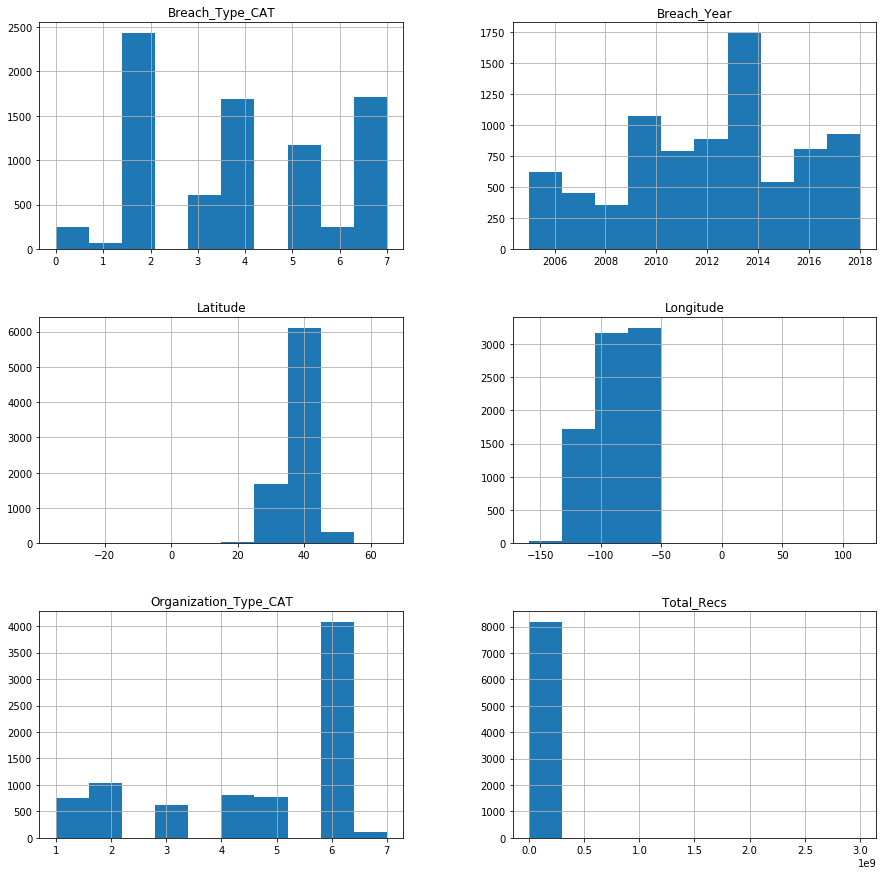

In [31]:
df.hist(figsize=(15,15))

In [32]:
df.groupby(['State', 'Breach_Year']).size()

State          Breach_Year
Alabama        2006            2
               2007            6
               2008            2
               2009            2
               2010            4
               2011           15
               2012            9
               2013            4
               2014           15
               2015            3
               2016            8
               2017            4
               2018            4
Alaska         2006            1
               2007            1
               2009            2
               2010            3
               2011            3
               2012            4
               2013            3
               2014            2
               2015            1
               2016            1
               2017            2
Arizona        2005            2
               2006            2
               2007            4
               2008            6
               2010           13
               2

In [33]:
df.groupby(['Breach_Year']).size()

Breach_Year
2005    136
2006    482
2007    454
2008    355
2009    271
2010    801
2011    788
2012    882
2013    852
2014    887
2015    539
2016    804
2017    602
2018    324
dtype: int64

In [34]:
#describe the column Date_Public only (e.g., count, unique, frequency)
df['Breach_Year'].describe()

count    8177.000000
mean     2012.204965
std         3.425944
min      2005.000000
25%      2010.000000
50%      2012.000000
75%      2015.000000
max      2018.000000
Name: Breach_Year, dtype: float64

In [35]:
#show the information about the dataset - no missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8177 entries, 0 to 8201
Data columns (total 11 columns):
Breach_Year              8177 non-null int64
Company                  8177 non-null object
State                    8177 non-null object
Breach_Type              8177 non-null object
Organization_Type        8177 non-null object
Total_Recs               8177 non-null int64
Description              8177 non-null object
Latitude                 8177 non-null float64
Longitude                8177 non-null float64
Breach_Type_CAT          8177 non-null int64
Organization_Type_CAT    8177 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 766.6+ KB


In [36]:
#describe the column Type of Organization only (e.g., count, unique, frequency)
df['Organization_Type'].describe()

count     8177
unique       7
top        MED
freq      4077
Name: Organization_Type, dtype: object

In [37]:
#describe the column Type of Organization category only (e.g., count, unique, frequency)
df['Organization_Type_CAT'].describe()

count    8177.000000
mean        4.534915
std         1.825506
min         1.000000
25%         3.000000
50%         6.000000
75%         6.000000
max         7.000000
Name: Organization_Type_CAT, dtype: float64

**Breach_Type and Organization_Type are categories**

##### 'MED' is top organization type

In [38]:
#describe the column Type of Breach only (e.g., count, unique, frequency)
df['Breach_Type'].describe()


count     8177
unique       8
top       HACK
freq      2431
Name: Breach_Type, dtype: object

##### 'HACK' is top type of breach.

In [39]:
#describe the column Type of Breach category only (e.g., count, unique, frequency)
df['Breach_Type_CAT'].describe()

count    8177.000000
mean        4.015042
std         1.992745
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Breach_Type_CAT, dtype: float64

In [40]:
#describe the column State only (e.g., count, unique, frequency)
df['State'].describe()

count           8177
unique            53
top       California
freq            1287
Name: State, dtype: object

In [42]:
df.to_csv("databreach_cleaned.csv")

Business questions include comparisons of data breaches in terms of U.S. states. 
•	Some large states (e.g., California) with many businesses/populations have more cases of data breaches than such U.S states     as Wyoming and Idaho. 
•	Data about gross domestic product (GDP) for U.S. states between 2005 and 2017 needs to be collected  
•	Normalize the number of data breaches by using each state's GDP.  Do a join by state code and year.

##### 'California' is top state for breaches reported, however, we need to normalize and adjust the frequency by the GDP to get the REAL statistic. Create a new dataframe with data breaches by state, then normalize.

In [43]:
df.groupby('State').groups

{'Alabama': Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
             51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
             68, 69, 70, 71, 72, 73, 74, 75, 76, 77],
            dtype='int64'),
 'Alaska': Int64Index([ 78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
              91,  92,  93,  94,  95,  96,  97,  98,  99, 100],
            dtype='int64'),
 'Arizona': Int64Index([101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
             ...
             226, 227, 228, 229, 230, 231, 232, 233, 234, 235],
            dtype='int64', length=135),
 'Arkansas': Int64Index([236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
             249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
             262, 263, 264, 265, 266, 26

In [44]:
#import gdp data ... open or read the gdp data
gp=pd.read_csv("gdpstate_naics_all/gdpstate_naics_all.csv")
gp.head()


,GeoFIPS,GeoName,Region,ComponentId,ComponentName,IndustryId,IndustryClassification,Description,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,United States,NaN,200,Gross domestic product (GDP) by state (million...,1,...,All industry total,8542530,9024434,...,14626598,14320114,14859772,15406002,16041243,16576738,17312308,18007206,18509998,19263350
1,0,United States,NaN,200,Gross domestic product (GDP) by state (million...,2,...,Private industries,7459395,7894015,...,12716179,12352979,12826507,13348439,13957545,14468465,15149621,15776274,16224645,16925936
2,0,United States,NaN,200,Gross domestic product (GDP) by state (million...,3,11,"Agriculture, forestry, fishing, and hunting",108796,99940,...,154525,137655,160217,197241,185800,221821,204404,184791,177580,173445
3,0,United States,NaN,200,Gross domestic product (GDP) by state (million...,4,111-112,Farms,88136,79030,...,126345,109800,129725,166249,151489,186960,167709,145476,136672,(NA)
4,0,United States,NaN,200,Gross domestic product (GDP) by state (million...,5,113-115,"Forestry, fishing, and related activities",20660,20910,...,28180,27855,30492,30992,34311,34861,36695,39315,40907,(NA)


##### Keeping GeoName, Componentid (to select by Componentid later) and years 2005 - 2017.  All other columns will be dropped.  Only Componentid of 200 will be used. 
##### Will group and sum by GeoName, then match with data by year.

In [45]:
gp = gp.drop(['GeoFIPS', 'Region', 'ComponentName', 'IndustryId', 'IndustryClassification', 'Description'], axis=1)
gp.head()

,GeoName,ComponentId,1997,1998,1999,2000,2001,2002,2003,2004,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,United States,200,8542530,9024434,9595951,10219801,10556006,10910833,11440109,12200160,...,14626598,14320114,14859772,15406002,16041243,16576738,17312308,18007206,18509998,19263350
1,United States,200,7459395,7894015,8403164,8956010,9223548,9499527,9950967,10627989,...,12716179,12352979,12826507,13348439,13957545,14468465,15149621,15776274,16224645,16925936
2,United States,200,108796,99940,92808,98517,100027,95800,116075,142695,...,154525,137655,160217,197241,185800,221821,204404,184791,177580,173445
3,United States,200,88136,79030,70934,76044,78094,74033,93102,118908,...,126345,109800,129725,166249,151489,186960,167709,145476,136672,(NA)
4,United States,200,20660,20910,21874,22473,21933,21767,22973,23787,...,28180,27855,30492,30992,34311,34861,36695,39315,40907,(NA)


In [46]:
gp = gp.drop(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004'], axis=1)
gp.head()

,GeoName,ComponentId,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,United States,200,13015161,13773226,14391149,14626598,14320114,14859772,15406002,16041243,16576738,17312308,18007206,18509998,19263350
1,United States,200,11366297,12045446,12572387,12716179,12352979,12826507,13348439,13957545,14468465,15149621,15776274,16224645,16925936
2,United States,200,128571,128345,141999,154525,137655,160217,197241,185800,221821,204404,184791,177580,173445
3,United States,200,104514,99352,113533,126345,109800,129725,166249,151489,186960,167709,145476,136672,(NA)
4,United States,200,24057,28993,28466,28180,27855,30492,30992,34311,34861,36695,39315,40907,(NA)


In [47]:
# Filter rows using a criterion (GDP only ) = 200

new_gp = gp[gp.ComponentId == '200']
new_gp

,GeoName,ComponentId,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,United States,200,13015161,13773226,14391149,14626598,14320114,14859772,15406002,16041243,16576738,17312308,18007206,18509998,19263350
1,United States,200,11366297,12045446,12572387,12716179,12352979,12826507,13348439,13957545,14468465,15149621,15776274,16224645,16925936
2,United States,200,128571,128345,141999,154525,137655,160217,197241,185800,221821,204404,184791,177580,173445
3,United States,200,104514,99352,113533,126345,109800,129725,166249,151489,186960,167709,145476,136672,(NA)
4,United States,200,24057,28993,28466,28180,27855,30492,30992,34311,34861,36695,39315,40907,(NA)
5,United States,200,226646,273405,314018,401457,290349,331720,398632,410940,450868,480588,327631,260593,329939
6,United States,200,156230,178223,205288,280516,184601,209323,252490,267432,313194,338123,213114,162121,(NA)
7,United States,200,43496,52394,58462,62971,65757,77327,88447,80072,73594,69883,62614,61628,(NA)
8,United States,200,26921,42788,50268,57970,39991,45070,57695,63436,64081,72583,51902,36844,(NA)
9,United States,200,201352,229998,235074,237514,250785,266986,272036,262852,269164,280579,282908,287088,295004


In [48]:
new_gp = new_gp.drop(['ComponentId'], axis=1)
new_gp.head()

,GeoName,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,United States,13015161,13773226,14391149,14626598,14320114,14859772,15406002,16041243,16576738,17312308,18007206,18509998,19263350
1,United States,11366297,12045446,12572387,12716179,12352979,12826507,13348439,13957545,14468465,15149621,15776274,16224645,16925936
2,United States,128571,128345,141999,154525,137655,160217,197241,185800,221821,204404,184791,177580,173445
3,United States,104514,99352,113533,126345,109800,129725,166249,151489,186960,167709,145476,136672,(NA)
4,United States,24057,28993,28466,28180,27855,30492,30992,34311,34861,36695,39315,40907,(NA)


In [49]:
new_gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5400 entries, 0 to 5399
Data columns (total 14 columns):
GeoName    5400 non-null object
2005       5400 non-null object
2006       5400 non-null object
2007       5400 non-null object
2008       5400 non-null object
2009       5400 non-null object
2010       5400 non-null object
2011       5400 non-null object
2012       5400 non-null object
2013       5400 non-null object
2014       5400 non-null object
2015       5400 non-null object
2016       5400 non-null object
2017       5400 non-null object
dtypes: object(14)
memory usage: 632.8+ KB


In [50]:
new_gp['2017'] = new_gp['2017'].replace(['(NA)'], '0')
new_gp['2016'] = new_gp['2016'].replace(['(NA)'], '0')
new_gp['2015'] = new_gp['2015'].replace(['(NA)'], '0')
new_gp['2014'] = new_gp['2014'].replace(['(NA)'], '0')
new_gp['2013'] = new_gp['2013'].replace(['(NA)'], '0')
new_gp['2012'] = new_gp['2012'].replace(['(NA)'], '0')
new_gp['2011'] = new_gp['2011'].replace(['(NA)'], '0')
new_gp['2010'] = new_gp['2010'].replace(['(NA)'], '0')
new_gp['2009'] = new_gp['2009'].replace(['(NA)'], '0')
new_gp['2008'] = new_gp['2008'].replace(['(NA)'], '0')
new_gp['2007'] = new_gp['2007'].replace(['(NA)'], '0')
new_gp['2006'] = new_gp['2006'].replace(['(NA)'], '0')
new_gp['2005'] = new_gp['2005'].replace(['(NA)'], '0')

In [51]:
new_gp['2005']=pd.to_numeric(new_gp['2005'], errors='coerce')
new_gp['2006']=pd.to_numeric(new_gp['2006'], errors='coerce')
new_gp['2007']=pd.to_numeric(new_gp['2007'], errors='coerce')
new_gp['2008']=pd.to_numeric(new_gp['2008'], errors='coerce')
new_gp['2009']=pd.to_numeric(new_gp['2009'], errors='coerce')
new_gp['2010']=pd.to_numeric(new_gp['2010'], errors='coerce')
new_gp['2011']=pd.to_numeric(new_gp['2011'], errors='coerce')
new_gp['2012']=pd.to_numeric(new_gp['2012'], errors='coerce')
new_gp['2013']=pd.to_numeric(new_gp['2013'], errors='coerce')
new_gp['2014']=pd.to_numeric(new_gp['2014'], errors='coerce')
new_gp['2015']=pd.to_numeric(new_gp['2015'], errors='coerce')
new_gp['2016']=pd.to_numeric(new_gp['2016'], errors='coerce')
new_gp['2017']=pd.to_numeric(new_gp['2017'], errors='coerce')

In [52]:
new_gp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5400 entries, 0 to 5399
Data columns (total 14 columns):
GeoName    5400 non-null object
2005       5382 non-null float64
2006       5385 non-null float64
2007       5378 non-null float64
2008       5378 non-null float64
2009       5377 non-null float64
2010       5377 non-null float64
2011       5380 non-null float64
2012       5386 non-null float64
2013       5390 non-null float64
2014       5389 non-null float64
2015       5390 non-null float64
2016       5391 non-null float64
2017       5392 non-null float64
dtypes: float64(13), object(1)
memory usage: 632.8+ KB


In [53]:
new_gp.groupby('GeoName').sum()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
GeoName,,,,,,,,,,,,,
Alabama,808437.0,847602.0,872058.0,886407.0,858404.0,894232.0,928116.0,958764.0,985504.0,1004334.0,1034454.0,1056452.0,931408.0
Alaska,207516.0,233876.0,259668.0,296315.0,264511.0,285414.0,311510.0,323021.0,317203.0,306051.0,270512.0,259129.0,227946.0
Arizona,1182301.0,1289785.0,1362237.0,1335204.0,1262204.0,1281732.0,1329067.0,1387248.0,1417447.0,1475845.0,1542968.0,1602386.0,1444232.0
Arkansas,472125.0,495655.0,508383.0,521646.0,509153.0,535879.0,561132.0,569753.0,599610.0,618974.0,623966.0,635156.0,565369.0
California,9276216.0,9876594.0,10283245.0,10452769.0,10060201.0,10343486.0,10729064.0,11263961.0,11747101.0,12475325.0,13263037.0,13839799.0,12338557.0
Colorado,1149495.0,1211497.0,1289700.0,1336808.0,1294506.0,1329812.0,1383927.0,1437981.0,1513039.0,1611444.0,1659149.0,1698954.0,1540864.0
Connecticut,1130676.0,1192608.0,1276311.0,1284355.0,1257904.0,1262495.0,1258668.0,1285878.0,1290610.0,1307785.0,1353515.0,1373564.0,1196548.0
Delaware,289785.0,304907.0,309892.0,299002.0,311646.0,312315.0,326119.0,330202.0,332958.0,363400.0,383817.0,388175.0,340847.0
District of Columbia,390056.0,409403.0,437256.0,457850.0,457076.0,480097.0,499573.0,510425.0,521817.0,545607.0,572344.0,592100.0,506057.0


**Will be creating .cvs file for both the breach file and the gdp file state by year**